In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
import cv2
import tensorflow
from kerastuner.tuners import RandomSearch
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential,load_model,Model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,MaxPooling2D,ZeroPadding2D,Activation,AveragePooling2D,GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input

In [2]:
path=r'C:\Users\meira\Downloads\UTKFace\UTKFace'
files=os.listdir(path)
df=pd.DataFrame(files,columns=['file_name'])
df['age']=df['file_name'].apply(lambda x: x.split('_')[0])
df['age']=df.age.astype(int)
df['link']=df['file_name'].apply(lambda x: f'{path}/{x}')

In [3]:
df.head()

,file_name,age,link
0,100_0_0_20170112213500903.jpg.chip.jpg,100,C:\Users\meira\Downloads\UTKFace\UTKFace/100_0...
1,100_0_0_20170112215240346.jpg.chip.jpg,100,C:\Users\meira\Downloads\UTKFace\UTKFace/100_0...
2,100_1_0_20170110183726390.jpg.chip.jpg,100,C:\Users\meira\Downloads\UTKFace\UTKFace/100_1...
3,100_1_0_20170112213001988.jpg.chip.jpg,100,C:\Users\meira\Downloads\UTKFace\UTKFace/100_1...
4,100_1_0_20170112213303693.jpg.chip.jpg,100,C:\Users\meira\Downloads\UTKFace\UTKFace/100_1...


Text(0.5, 1.0, 'Number of ages')

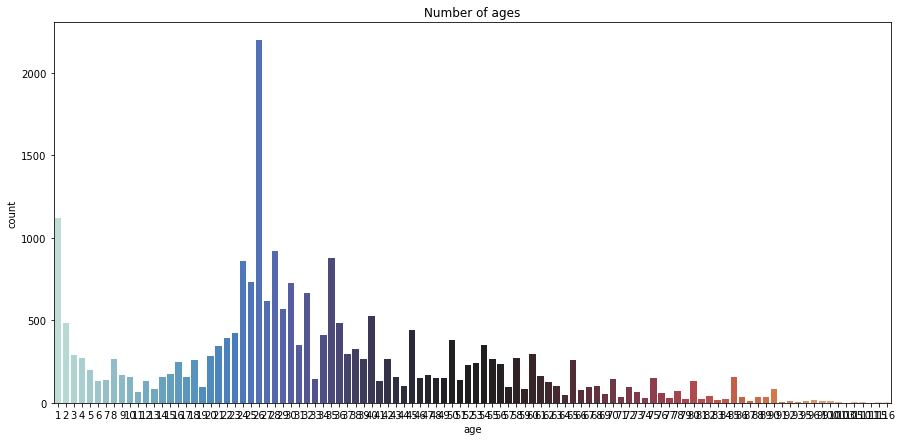

In [4]:
plt.figure(figsize=(15,7))
g = sns.countplot(df['age'], palette="icefire")
plt.title("Number of ages")

Text(0.5, 1.0, 'Density of ages')

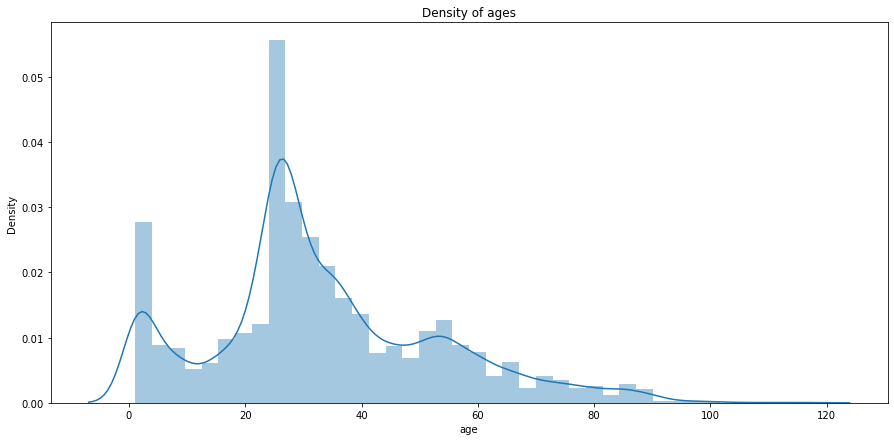

In [5]:
plt.figure(figsize=(15,7))
g = sns.distplot(df['age'],kde=True, bins=40)
plt.title("Density of ages")

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,23708.0,33.303484,19.886112,1.0,23.0,29.0,45.0,116.0


In [7]:
def label(x):
    if x<=18:
        return 0
    elif x<=30:
        return 1
    elif x<=80:
        return 2    
    else:
        return 3
    
df['lable']=df.age.apply(lambda x: label(x))
   

In [8]:
df['lable'].value_counts()

2    10507
1     8166
0     4495
3      540
Name: lable, dtype: int64

Text(0.5, 1.0, 'Number of lable')

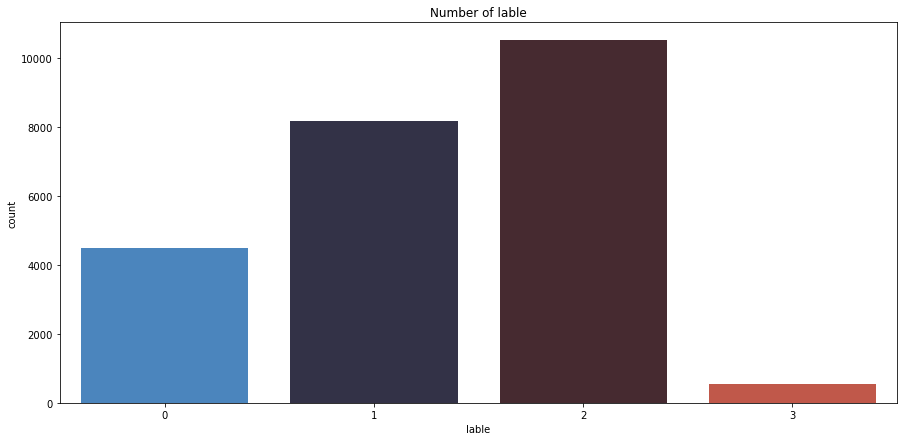

In [9]:
plt.figure(figsize=(15,7))
g = sns.countplot(df['lable'], palette="icefire")
plt.title("Number of lable")

In [10]:
temp=df.copy()
count=0
for index,row in temp.iterrows():
    image = cv2.imread(row['link'])
    face_cascade = cv2.CascadeClassifier(r'C:\Users\meira\Downloads\haarcascade_frontalface_default.xml')  
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    if len(faces)==0:
        temp.at[index,'leave']=0
    else:
        temp.at[index,'leave']=1
    count+=1
    print(f'{count}/{len(temp)}',end='\r')

In [11]:
a=temp[temp['leave']==1.0]

Text(0.5, 1.0, 'Number of lable')

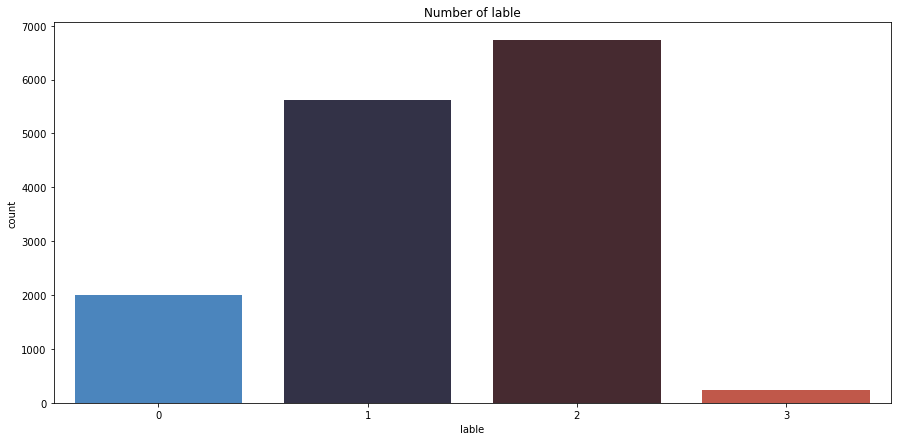

In [12]:
plt.figure(figsize=(15,7))
g = sns.countplot(a['lable'], palette="icefire")
plt.title("Number of lable")

In [13]:
a.lable.value_counts()

2    6727
1    5621
0    1996
3     236
Name: lable, dtype: int64

#remove class 3 beacuse it has not enough data

In [14]:
df_temp=a.copy()
df_temp=df_temp[~(df_temp['lable']==3)]

Text(0.5, 1.0, 'Number of lable')

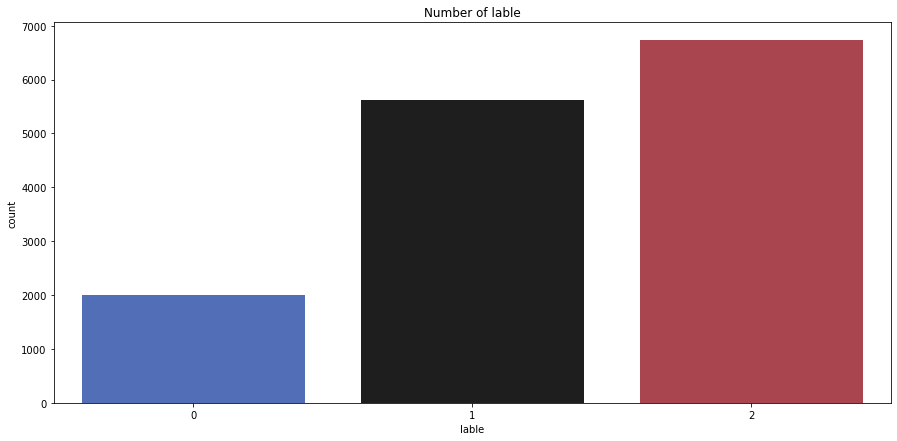

In [15]:
plt.figure(figsize=(15,7))
g = sns.countplot(df_temp['lable'], palette="icefire")
plt.title("Number of lable")

Text(0.5, 1.0, 'Density of ages')

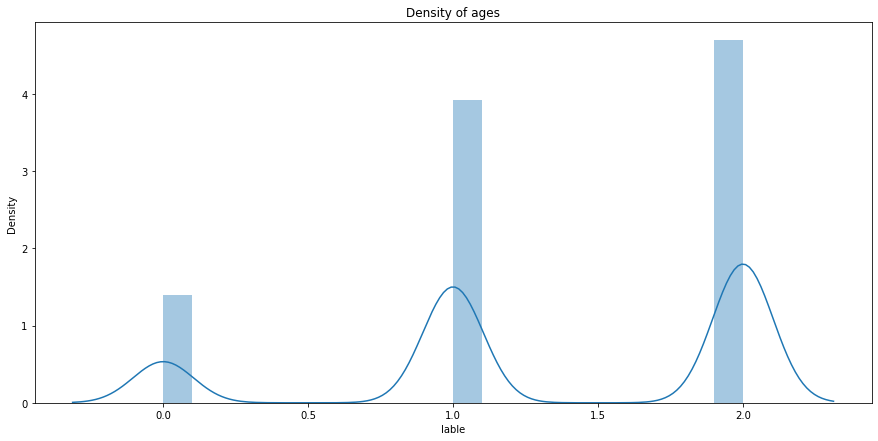

In [16]:
plt.figure(figsize=(15,7))
g = sns.distplot(df_temp['lable'],kde=True, bins=20)
plt.title("Density of ages")    

In [17]:
temp=df_temp.copy()
X=[]
count=0
for index,row in temp.iterrows():
    image = cv2.imread(row['link'])
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)    
    gray=gray/255
    X.append(gray)
    count+=1
    print(f'{count}/{len(temp)}',end='\r')

In [18]:
temp["lable"]=temp["lable"].astype(int)
y=temp["lable"]
Y_train=y[0:]
x=X[0:]
X_train=np.asarray(x)

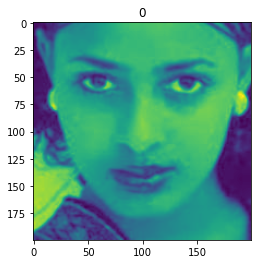

C:\Users\meira\Downloads\UTKFace\UTKFace/16_1_0_20170117133441179.jpg.chip.jpg


In [19]:
img = X_train[1000]
img = img.reshape((200,200,1))
plt.imshow(img)
plt.title(Y_train[1000])
plt.show()
print(temp['link'][1000])

Text(0.5, 1.0, 'Number of lable')

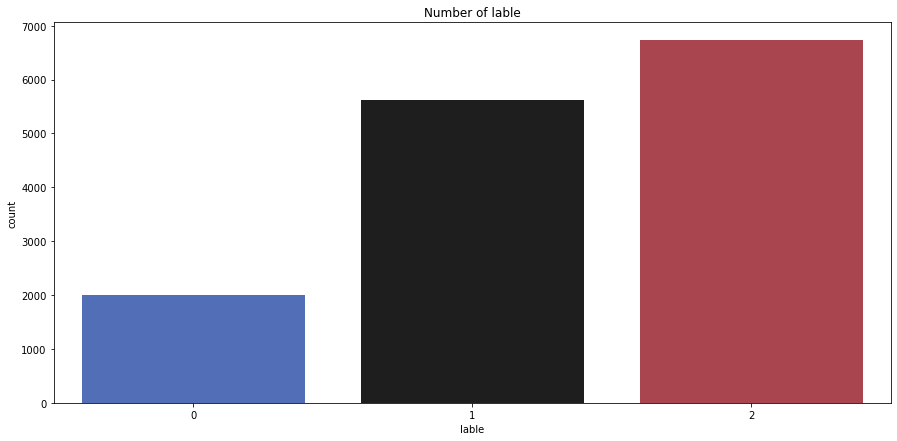

In [20]:
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="icefire")
plt.title("Number of lable")

In [21]:
Y_train=np.asarray(Y_train).reshape(-1,1)
Y_train = to_categorical(Y_train)
X_train = X_train.reshape(-1,200,200,1).astype("float") 
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.10, random_state=42)
print("x_train shape",X_train.shape,type(X_train))
print("x_test shape",X_test.shape,type(X_test))
print("y_train shape",Y_train.shape,type(Y_train))
print("y_test shape",Y_test.shape,type(Y_test))

x_train shape (12909, 200, 200, 1) <class 'numpy.ndarray'>
x_test shape (1435, 200, 200, 1) <class 'numpy.ndarray'>
y_train shape (12909, 3) <class 'numpy.ndarray'>
y_test shape (1435, 3) <class 'numpy.ndarray'>


In [24]:
from kerastuner.tuners import RandomSearch
batch_size=32
epochs=5
def build_model(hp):
    model = Sequential()    
    model=Sequential()
    model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(200, 200, 1)))
    model.add(MaxPooling2D((2,2)))
#     for i in range(hp.Int('Conv layers',min_value=0,max_value=3)):
#         model.add(Conv2D(hp.Choice(f'layer_{i}_filters',[32,64,128],3,activation='relu')))    
    model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(128,kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(hp.Choice('Dense_layer',[32,64,128]), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax'))
    optimizer = Adam(lr = 1e-6,beta_1 = 0.9, beta_2 = 0.999)
    model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics = ["accuracy"])
    return model

In [25]:
tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=3,
                     directory=r'C:\Users\meira\OneDrive\Desktop\zulfyia\tuner'
                     )
tuner.search(X_train,Y_train,validation_data=(X_test,Y_test),epochs=epochs,batch_size=batch_size)

Trial 3 Complete [00h 54m 50s]
val_accuracy: 0.7407665252685547

Best val_accuracy So Far: 0.7574912905693054
Total elapsed time: 02h 47m 47s
INFO:tensorflow:Oracle triggered exit


In [26]:
best_model=tuner.get_best_models()[0]

In [27]:
best_model.evaluate(X_test,Y_test)

45/45 [==============================] - 20s 436ms/step - loss: 0.5696 - accuracy: 0.7575


[0.5695530772209167, 0.7574912905693054]

In [28]:
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)     

In [29]:
model = Sequential()    
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(200, 200, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu')) # found by hyperparameter tuner
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
optimizer = Adam(lr = 1e-6,beta_1 = 0.9, beta_2 = 0.999)
model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics = ["accuracy"])

In [30]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(X_train)

In [31]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=32),
                              epochs = 9, validation_data = (X_test,Y_test))

Epoch 1/9
404/404 [==============================] - 701s 2s/step - loss: 0.9512 - accuracy: 0.5343 - val_loss: 0.8593 - val_accuracy: 0.5833
Epoch 2/9
404/404 [==============================] - 672s 2s/step - loss: 0.8690 - accuracy: 0.5889 - val_loss: 0.8255 - val_accuracy: 0.6202
Epoch 3/9
404/404 [==============================] - 674s 2s/step - loss: 0.8317 - accuracy: 0.6134 - val_loss: 0.8055 - val_accuracy: 0.6251
Epoch 4/9
404/404 [==============================] - 674s 2s/step - loss: 0.7947 - accuracy: 0.6347 - val_loss: 0.7613 - val_accuracy: 0.6481
Epoch 5/9
404/404 [==============================] - 679s 2s/step - loss: 0.7638 - accuracy: 0.6544 - val_loss: 0.7191 - val_accuracy: 0.6794
Epoch 6/9
404/404 [==============================] - 689s 2s/step - loss: 0.7316 - accuracy: 0.6770 - val_loss: 0.6927 - val_accuracy: 0.7010
Epoch 7/9
404/404 [==============================] - 700s 2s/step - loss: 0.7061 - accuracy: 0.6886 - val_loss: 0.6945 - val_accuracy: 0.7010
Epoch 

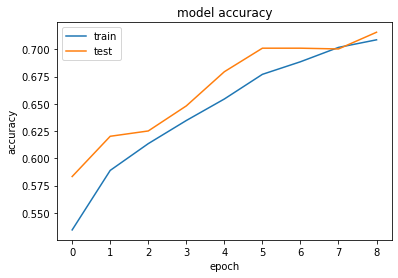

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

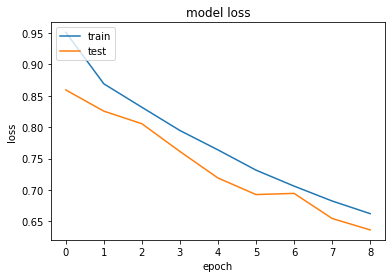

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()